<a href="https://colab.research.google.com/github/nitish-09105/OIBSIP1/blob/master/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Prediction Using selected Machine Learning Algorithms**

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations, etc. The recipient (i.e. the borrower) incurs a debt, and is usually liable to pay interest on that debt until it is repaid, and also to repay the principal amount borrowed. To read more check out Wikipedia. The whole process of ascertaining if a burrower would pay back loans might be tedious hence the need to automate the procedure.

In this blog post, I’d be walking us through Loan prediction using some selected Machine Learning Algorithms.

**Source of Dataset:** The dataset for this project is retrieved from kaggle, the home of Data Science.

The problem at hand: The major aim of this project is to predict which of the customers will have their loan paid or not. Therefore, this is a supervised classification problem to be trained with algorithms like:

  Logistic Regression
  Decision Tree
  Random Forest

**Note:** The machine learning classifier that can be used is not limited to the aforementioned. Other models like XGBoost, CatBoost and the likes can be applied in the training of the model. The choice of these three algorithms is sequel upon the desire to keep the model explanatory of itself and also, the dataset is small.

**Disclaimer**:

In this project, default hyperparameter values are employed.
More visualization can be done beyond what’s executed in this post
The training dataset provided is the focus because we are not making a submission to kaggle for scoring. Hence, we split the train into a validation set to get our evaluations estimated.

# **Importing Modules and datasets**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [138]:
loan_train=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
loan_test=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
loan_train.shape

(614, 13)

In [11]:
loan_test.shape

(367, 12)

In [12]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

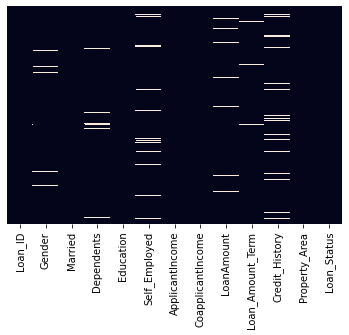

In [16]:
sns.heatmap(loan_train.isnull(),yticklabels=False,cbar=False)

In [19]:
loan_train['LoanAmount']=loan_train["LoanAmount"].fillna(loan_train["LoanAmount"].mean())
loan_train['Loan_Amount_Term']=loan_train["Loan_Amount_Term"].fillna(loan_train["Loan_Amount_Term"].mean())
loan_train['Credit_History']=loan_train["Credit_History"].fillna(loan_train["Credit_History"].mean())

In [20]:
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
Gender=pd.get_dummies(loan_train["Gender"],drop_first=True)
Dependents=pd.get_dummies(loan_train["Dependents"],drop_first=True)
Self_Employed=pd.get_dummies(loan_train["Self_Employed"],drop_first=True)
loan_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
loan_train["Gender"] = loan_train["Gender"].fillna(loan_train["Gender"].dropna().mode().values[0])
loan_train["Dependents"] = loan_train["Dependents"].fillna(loan_train["Dependents"].dropna().mode().values[0])
loan_train["Self_Employed"] = loan_train["Self_Employed"].fillna(loan_train["Self_Employed"].dropna().mode().values[0] )
loan_train["Married"] = loan_train["Married"].fillna(loan_train["Married"].dropna().mode().values[0] )
loan_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

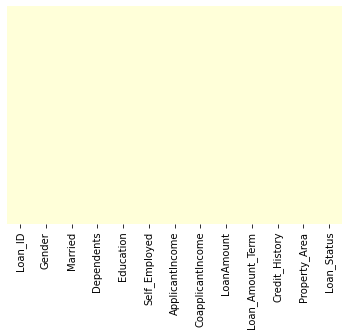

In [31]:
sns.heatmap(loan_train.isnull(),yticklabels=False,cbar=False,cmap="YlGnBu")

In [32]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# **Analysis**

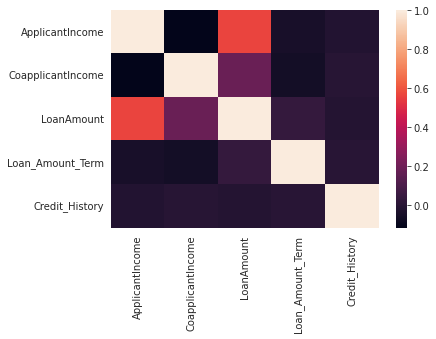

In [72]:
sns.heatmap(loan_train.corr())

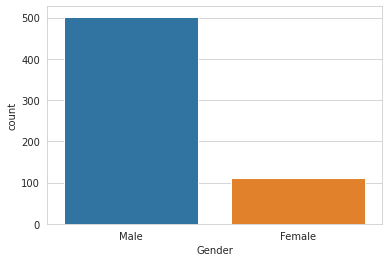

In [49]:
sns.countplot(x="Gender",data=loan_train)

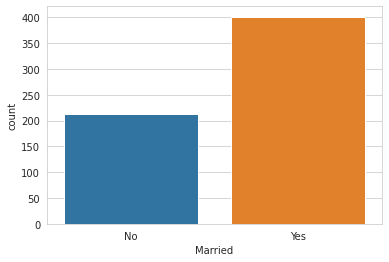

In [48]:
sns.countplot(x="Married",data=loan_train)

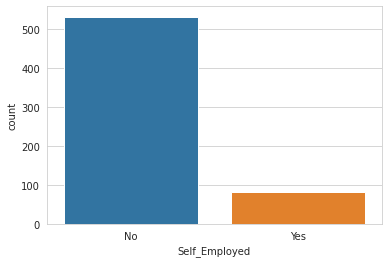

In [47]:
sns.countplot(x="Self_Employed",data=loan_train)

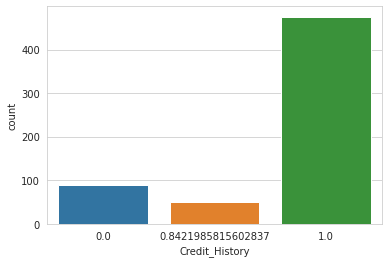

In [46]:
sns.countplot(x="Credit_History",data=loan_train)

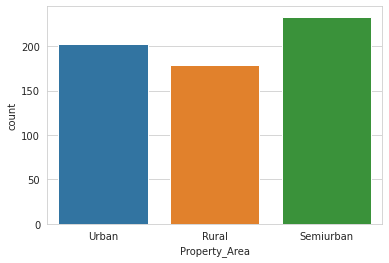

In [50]:
sns.countplot(x="Property_Area",data=loan_train)

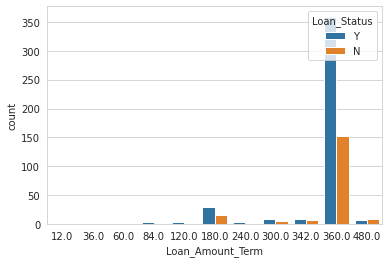

In [55]:
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=loan_train)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


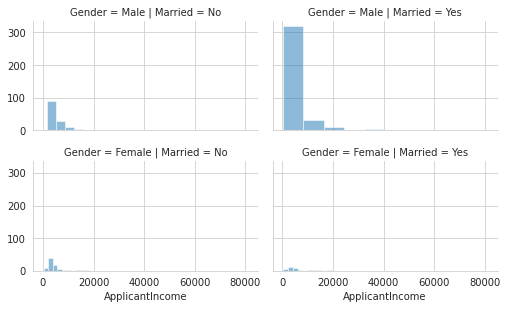

In [52]:
grid=sns.FacetGrid(loan_train,row="Gender",col="Married",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


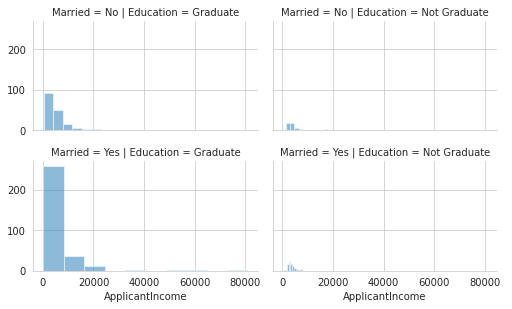

In [56]:
grid=sns.FacetGrid(loan_train,row="Married",col="Education",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


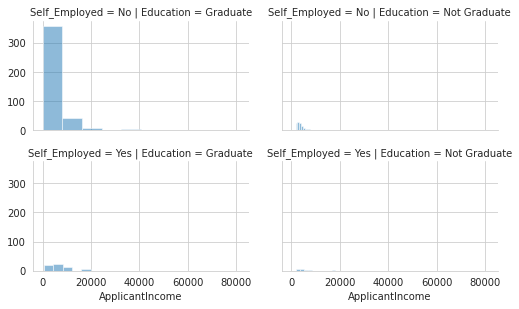

In [57]:
grid=sns.FacetGrid(loan_train,row="Self_Employed",col="Education",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


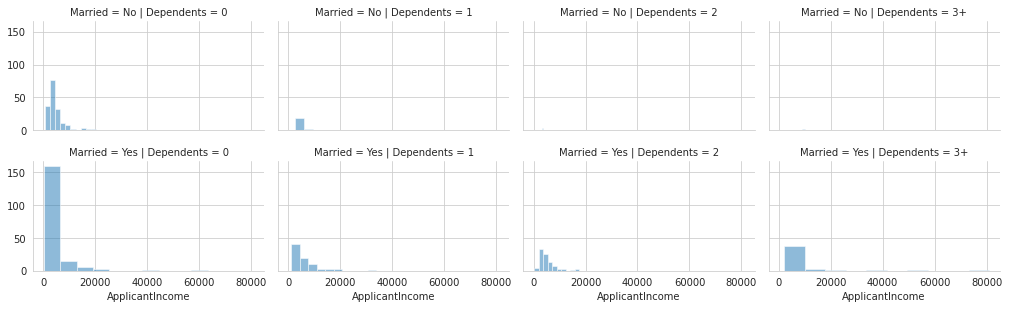

In [58]:
grid=sns.FacetGrid(loan_train,row="Married",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


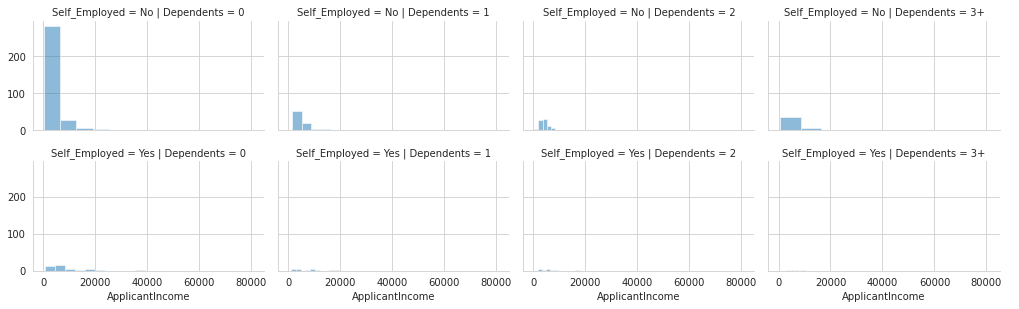

In [59]:
grid=sns.FacetGrid(loan_train,row="Self_Employed",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


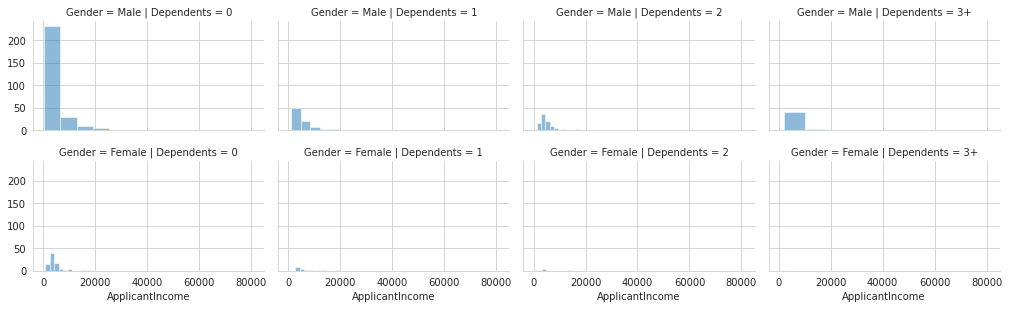

In [60]:
grid=sns.FacetGrid(loan_train,row="Gender",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


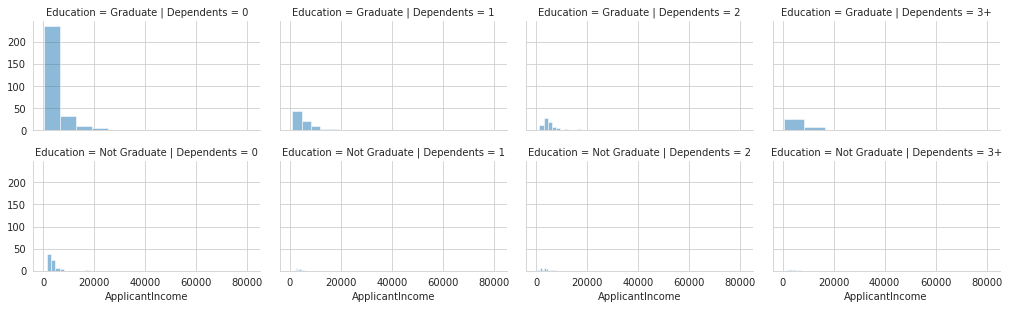

In [61]:
grid=sns.FacetGrid(loan_train,row="Education",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


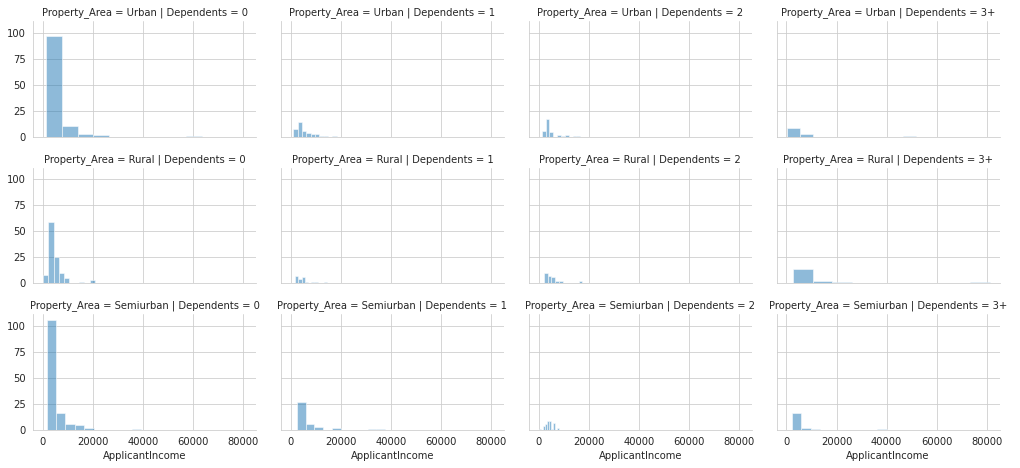

In [62]:
grid=sns.FacetGrid(loan_train,row="Property_Area",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


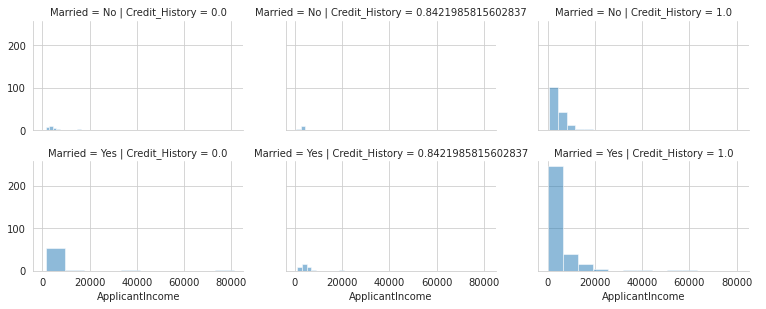

In [63]:
grid=sns.FacetGrid(loan_train,row="Married",col="Credit_History",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


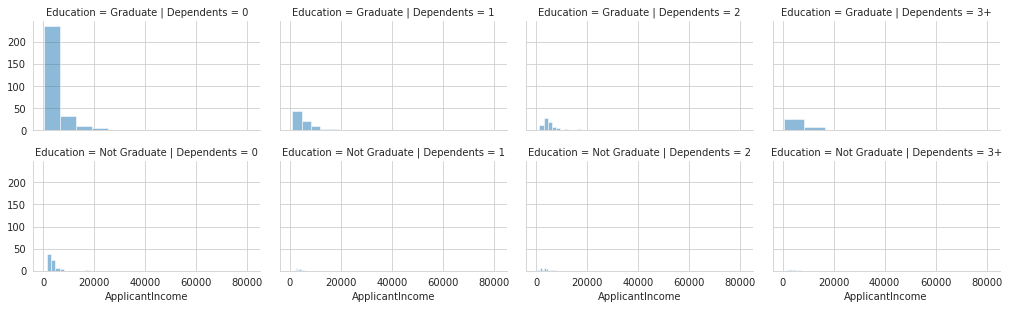

In [64]:
grid=sns.FacetGrid(loan_train,row="Education",col="Dependents",size=2.2,aspect=1.6)
grid.map(plt.hist,"ApplicantIncome",alpha=.5,bins=10)
grid.add_legend()

In [75]:
code_numeric = {"Male": 1,"Female": 2,"Yes": 1, "No": 2,"Graduate":1,"Not Graduate":2,"Urban":3,"Semiurban": 2,"Rural":1,"Y":1,"N":0,"3+":3}

# **Train**

In [76]:
loan_train = loan_train.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
loan_test = loan_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)

In [77]:
loan_train.drop("Loan_ID", axis = 1, inplace = True)

In [78]:
loan_train["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [79]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


In [81]:
Dependents_= pd.to_numeric(loan_train.Dependents)
Dependents__=pd.to_numeric(loan_test.Dependents)

In [82]:
loan_train.drop(["Dependents"], axis = 1, inplace = True)
loan_test.drop(["Dependents"], axis = 1, inplace = True)

In [83]:
loan_train = pd.concat([loan_train, Dependents_], axis = 1)
loan_test = pd.concat([loan_test, Dependents__], axis = 1)

In [84]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


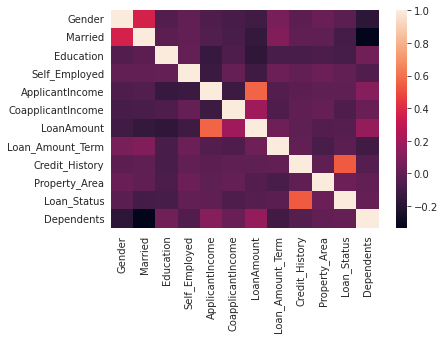

In [85]:
sns.heatmap(loan_train.corr())

In [87]:
y=loan_train["Loan_Status"]
X=loan_train.drop("Loan_Status",axis=1)

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

**Logistic Regression**

In [118]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [112]:
ypred = model.predict(X_test)
model.score(X_test,y_test)

0.8455284552845529

In [115]:
evaluation=f1_score(y_test, ypred)
evaluation                                  

0.9025641025641026

**Decision Tree**

In [119]:
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
ypred_tree=tree.predict(X_test)
ypred_tree

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [120]:
evaluation_tree=f1_score(y_test,ypred_tree)
evaluation_tree

0.7647058823529411

**Random Forest**

In [122]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
ypred_forest=forest.predict(X_test)
ypred_forest

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [124]:
evaluation_forest=f1_score(y_test,ypred_forest)
evaluation_tree

0.7647058823529411

**Conclusion**

From the Exploratory Data Analysis, we could generate insight from the data. How each of the features relates to the target. Also, it can be seen from the evaluation of three models that Logistic Regression performed better than others, Random Forest did better than Decision Tree.

# **Preparing new data for test**

In [136]:
new_data=pd.read_csv('/content/drive/My Drive/loan price prediction project/test_data.csv')

In [137]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [139]:
new_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [143]:
new_data["Gender"] = new_data["Gender"].fillna(new_data["Gender"].dropna().mode().values[0])
new_data["Dependents"] = new_data["Dependents"].fillna(new_data["Dependents"].dropna().mode().values[0])
new_data["Self_Employed"] = new_data["Self_Employed"].fillna(new_data["Self_Employed"].dropna().mode().values[0])
new_data["LoanAmount"] = new_data["LoanAmount"].fillna(new_data["LoanAmount"].dropna().mode().values[0])
new_data["Loan_Amount_Term"] = new_data["Loan_Amount_Term"].fillna(new_data["Loan_Amount_Term"].dropna().mode().values[0])
new_data["Credit_History"] = new_data["Credit_History"].fillna(new_data["Credit_History"].dropna().mode().values[0])

In [144]:
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [167]:
cols=['Education','Self_Employed','Property_Area','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in cols:
  new_data[x]=le.fit_transform(new_data[x])
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,Yes,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,Yes,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,Yes,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,Yes,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,No,0,1,0,3276,0,78.0,360.0,1.0,2


# **Random Forest prediction**

In [169]:
forest=RandomForestClassifier()
forest.fit(X_train,y_train)
ypred_forest=forest.predict(X_test)
ypred_forest

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [170]:
result=f1_score(y_test,ypred_forest)
result

0.8749999999999999